# Advection-Diffusion Equation

Hello everyone! we have already learned about advection equation and diffusion equation in the second module separately. However, the world is not always that simple. What will happen when advenction combines with diffusion? Here we are! we get a new equation: advection-diffusion equation.


The advection-diffusion equation are widely used to describe how heat or particals transport inside the physical system according to both advection and diffusion processes. In this module we consider the AD equation is used to solve the pollutant problem. The first part is simple. We'll look at the 1-D AD equation, and solve it with numerical solution. we also compare numerical solution to exact solution to see if the result is accurate enough? In the second part, we'll discuss the 2-D AD equation. Like before, we solve the 2-D AD equation with numerical solution, and we also try to plot the result in 3D figure.

## 1-D AD Equation

Now, we look at the one-dimensional AD equation:


$$\frac{\partial C}{\partial x}+u\frac{\partial C}{\partial x}=D\frac{\partial^2 C}{\partial x^2}$$


where C(x,t) is the concentration of the pollutant with respect to position x and time t. u is the constant speed along x direction and D is the diffusion coefficient.

we set the boundary and initial condition, as follows:

$$C(0,t)=0$$
$$C(L,t)=1$$
$$C(x,0)=\frac{x}{L} ~~~~~~~~ 0\leq x\leq L$$

We set $L~=~1.0~m$ , $D~=~0.01~m^{2}s^{-1}$, $u~=~0.1~ms^{-1}$, $~\Delta x~=~0.02~m$ and $\Delta t~=~0.01~s$. In this case, it has an exact solution, given by:

$$C=\frac{e^{R_{L}x/L}-1}{e^{R_{L}}-1} ~~~~~~~~ R_{L}=\frac{uL}{D}$$

### Discretize eqaution

we use forward difference for time, central difference in space and 2nd-order method for the second derivatives yields as usual:

$$\frac{C_{i}^{n+1}-C_{i}^{n}}{\Delta t}+u\frac{C_{i+1}^{n}-C_{i-1}^{n}}{2\Delta x}=D\frac{C_{i+1}^{n}-2C_{i}^{n}+C_{i-1}^{n}}{\Delta x^{2}}$$

As before, we rearrange discretization to obtain an new equation for the only unknown element, as follows:

$$C_{i}^{n+1}=C_{i}^{n}-u\frac{\Delta t}{2\Delta x}(C_{i+1}^{n}-C_{i-1}^{n})+D\frac{\Delta t}{\Delta x^{2}}(C_{i+1}^{n}-2C_{i}^{n}+C_{i-1}^{n})$$

### Now compute

First, we imoprt the usual things from libraries.

In [1]:
%matplotlib inline
import numpy
import sympy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Then, we set some initial parameters. we define a number of spatial grid points: $nx~=~51$, a number of time steps: $nt~=~1000$, and a step in time: $dt$. Caution! The equation will keep stable if we make sure $dt$ matches following conditions:

$$D\frac{\Delta t}{\Delta x^{2}}\leq\frac{1}{2}$$

and

$$\frac{1}{2}(u\frac{\Delta t}{\Delta x})^{2}\leq D\frac{\Delta t}{\Delta x^{2}}$$

we simplify two restrictions about size of a time step:

$$\Delta t\leq min({\frac{\Delta x^{2}}{2D},\frac{2D}{u^{2}}})$$

Check if $dt$ matches the conditions above?

In [2]:
nx = 51
dx = 1/(nx-1)
nt = 1000
dt = 0.01
u = 0.1     # constant speed of u = 0.1 m/s
D = 0.01    # diffusion coefficient of D = 0.01
L = 1.0
x = numpy.linspace(0,1,nx)

Let's plot the initial conditon of concentration C in x direction

(0, 1)

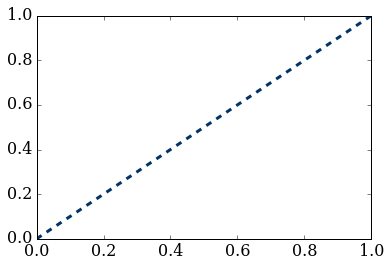

In [3]:
C = numpy.zeros(nx)
for i in range(nx):
    if 0 <= x[i] <= 1:
        C[i] = x[i]/L
pyplot.plot(x, C, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1)

Now, we'll see the result of 1-D AD equation by numerical suolution.

(0, 1)

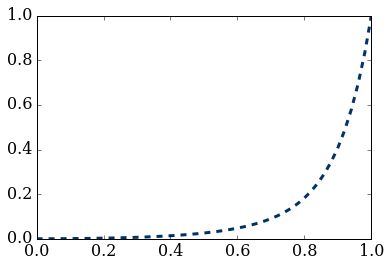

In [4]:
for n in range(nt):
    
    Cn = C.copy()
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])
            
    C[0] = 0
    C[-1] = 1

pyplot.plot(x, C, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1)

### Animations

Let's see how concentration C changing by time.

In [5]:
from matplotlib import animation
from IPython.display import HTML

Reset our initial conditions.

In [6]:
nt = 1000
C = numpy.zeros(nx)
for i in range(nx):    
    if 0 <= x[i] <= 1:
        C[i] = x[i]/L        

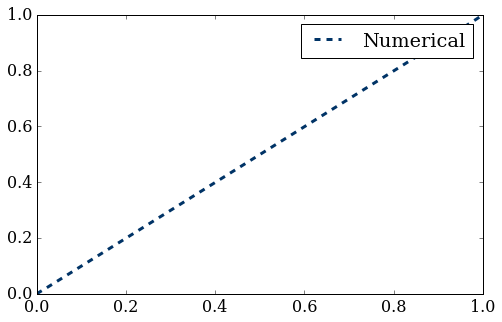

In [7]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,1), ylim=(0,1))
line = ax.plot([], [], color='#003366', ls='--', lw =3)[0]
ax.legend(['Numerical'])

def AD_equation(i):
    
    Cn = C.copy()
    
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])
    C[0] = 0
    C[-1] = 1
    
    line.set_data(x,C)

anim = animation.FuncAnimation(fig, AD_equation,
                               frames=nt, interval=10)

In [8]:
HTML(anim.to_html5_video())

Good!, the animation looks great but is this correct? Is this numerical solution converge to the exact solution? Let's find out! 

### Check out

Now, we'll load SymPy library and NumPy library to help us to express the exact solution equation.

In [9]:
%matplotlib inline
import numpy
import sympy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Let's define symbols: x, R, L and express the exact solution equation. Then we'll import lambdify function to turn the SymPy equation into an usable equation. At last, let lambdify know which variables and function we prepare to call.

In [10]:
x, R, L = sympy.symbols('x, R, L')

In [11]:
from sympy.utilities.lambdify import lambdify
c = (sympy.exp(R * x / L) - 1) / (sympy.exp(R) - 1)
print(c)

(exp(R*x/L) - 1)/(exp(R) - 1)


In [12]:
c_lamb = lambdify((x, R, L), c)

Now, we reset our initial conditions. Then we plan to generate the plot of lambdify-ed equation and numerical equation in the same plot in order to tell the difference apparently.

In [13]:
### variable declarations
nx = 51
dx = 1/(nx-1)
nt = 1000
dt = 0.01
u = 0.1     # constant speed of u = 0.1 m/s
D = 0.01    # diffusion coefficient of D = 0.01
L = 1.0
R = u * L / D

x = numpy.linspace(0,1,nx)

In [14]:
c = numpy.asarray([c_lamb(x0, R, L) for x0 in x])
c

array([  0.00000000e+00,   1.00521260e-05,   2.23298205e-05,
         3.73258304e-05,   5.56419982e-05,   7.80134161e-05,
         1.05337928e-04,   1.38712161e-04,   1.79475543e-04,
         2.29264049e-04,   2.90075868e-04,   3.64351591e-04,
         4.55072164e-04,   5.65878522e-04,   7.01217714e-04,
         8.66521376e-04,   1.06842372e-03,   1.31502781e-03,
         1.61623072e-03,   1.98412079e-03,   2.43346273e-03,
         2.98229021e-03,   3.65262962e-03,   4.47138401e-03,
         5.47141289e-03,   6.69285092e-03,   8.18471870e-03,
         1.00068901e-02,   1.22324953e-02,   1.49508557e-02,
         1.82710685e-02,   2.23263855e-02,   2.72795610e-02,
         3.33293832e-02,   4.07186527e-02,   4.97439268e-02,
         6.07674215e-02,   7.42315484e-02,   9.06766701e-02,
         1.10762787e-01,   1.35296026e-01,   1.65260991e-01,
         2.01860283e-01,   2.46562758e-01,   3.01162485e-01,
         3.67850742e-01,   4.49303963e-01,   5.48791151e-01,
         6.70305078e-01,

In [15]:
from matplotlib import animation
from IPython.display import HTML

In [16]:
C = numpy.zeros(nx)
for i in range(nx):    
    if 0 <= x[i] <= 1:
        C[i] = x[i]/L 
        
c = numpy.asarray([c_lamb(x0, R, L) for x0 in x])

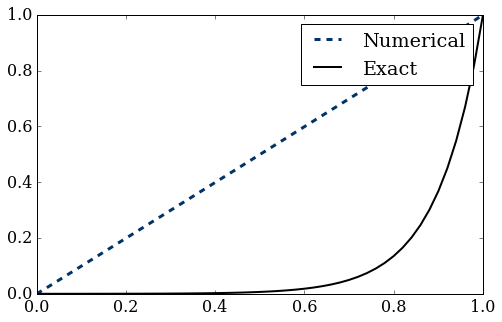

In [17]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,1), ylim=(0,1))
line = ax.plot([], [], color='#003366', ls='--', lw =3)[0]
line2 = ax.plot([], [], 'k-', lw=2)[0]
ax.legend(['Numerical','Exact'])

def AD_equation(i):
    
    Cn = C.copy()
    
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])
    C[0] = 0
    C[-1] = 1
            
    C_exact = numpy.asarray([c_lamb(xi, R, L) for xi in x])
    line.set_data(x,C)
    line2.set_data(x,C_exact)
    
anim = animation.FuncAnimation(fig, AD_equation,
                               frames=nt, interval=10)

In [18]:
HTML(anim.to_html5_video())

Looks good! The numerical solution is converge to the exact solution which means our discretized method is correct!

# 2-D AD Equation

1-D AD equation is just appetizer. Now, let's discuss about 2-D AD equation:

$$\frac{\partial C}{\partial x}+u\frac{\partial C}{\partial x}+\nu \frac{\partial C}{\partial y}=D(\frac{\partial^2 C}{\partial x^2}+\frac{\partial^2 C}{\partial y^2})$$

where u is a constant speed in x direction, $\nu$ is a constant speed in y direction and D is a constant diffusion coefficient in the horizontal direction.

Then, we set some appropriate initial and boundary conditions.

$$C(x,y,0) ~ = ~ 0 ~~~~~~~~ 0< x\leq 1 ~ ; ~ 0< y\leq 1$$


$$C(0,y,t) ~ = ~ 1 ~~~~~~~~ 0.5\leq y\leq 1$$


$$C(x,0,t) ~ = ~ 1 ~~~~~~~~ 0.3\leq x\leq 0.6$$


$$\frac{\partial C}{\partial x}(0,y,t) ~ = ~ q_{x} ~~~~~~~~ 0< y\leq 1$$


$$\frac{\partial C}{\partial y}(x,0,t) ~ = ~ q_{y} ~~~~~~~~ 0< x\leq 1$$

we set the initial parameters just like 1-D AD equation:$L~=~1.0~m$ , $W~=~1.0~m$, $D~=~0.01~m^{2}s^{-1}$, $u~=~0.1~ms^{-1}$, $~\Delta x~=~0.02~m$ and $\Delta t~=~0.01~s$, and assume this system is insulate so that $q_{x} ~ = ~ q_{y} ~ = ~ 0$.

### Discretize eqaution

we  also use forward difference for time, central difference in space and 2nd-order method for the second derivatives yields like 1-D AD equation. The only difference is that we should store C in 2-D array $C_{i,j}$.

$$\frac{C_{i,j}^{n+1}-C_{i,j}^{n}}{\Delta t}+u\frac{C_{i+1,j}^{n}-C_{i-1,j}^{n}}{2\Delta x}+\nu\frac{C_{i,j+1}^{n}-C_{i,j-1}^{n}}{2\Delta y}=D(\frac{C_{i+1,j}^{n}-2C_{i,j}^{n}+C_{i-1,j}^{n}}{\Delta x^{2}}+\frac{C_{i,j+1}^{n}-2C_{i,j}^{n}+C_{i,j-1}^{n}}{\Delta y^{2}})$$

Next time step value $C_{i,j}^{n+1}$ can be expressed as:

$$C_{i,j}^{n+1}=C_{i,j}^{n}-u\frac{\Delta t}{2\Delta x}(C_{i+1,j}^{n}-C_{i-1,j}^{n})-\nu\frac{\Delta t}{2\Delta y}(C_{i,j+1}^{n}-C_{i,j-1}^{n})+D(\frac{\Delta t}{\Delta x^{2}}(C_{i+1,j}^{n}-2C_{i,j}^{n}+C_{i-1,j}^{n})+\frac{\Delta t}{\Delta y^{2}}(C_{i,j+1}^{n}-2C_{i,j}^{n}+C_{i,j-1}^{n}))$$

### Now compute

Import usual libraries and in order to plot 3-D plot we also import cm and Axes3D.

In [19]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Set parameters, initial and boundary conditions.

In [20]:
L = 1.0
W = 1.0

nx = 51
ny = 51
nt = 1000

dx = L/(nx-1)
dy = W/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,W,ny)

D = 0.01     
u = 0.1
v = 0.1

dt = 0.01

In [21]:
C = numpy.zeros((ny, nx))

for i in range(ny):
    if 0.5 <= y[i]: 
        C[i,0] = 1
    else: 
        C[i,0] = 0

for i in range(nx):
    if 0.3 <= x[i] and 0.6 >= x[i]: 
        C[0,i] = 0.5
    else:
        C[0,i] = 0

Now, plot the initial variables.

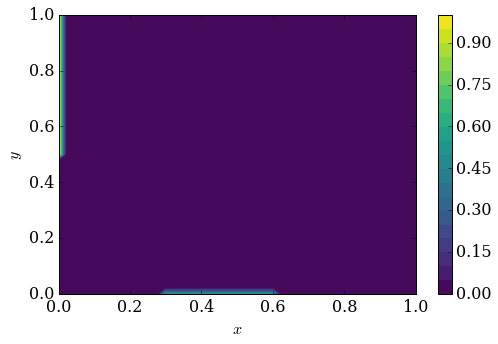

In [22]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,C,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Now, define the 2-D AD equation function by discretized method. Neumann boundary is used in this function.

In [23]:
def AD_equation_2d(C, nt, D, u, v, dt, dx, dy):
    
    for n in range(nt):
        
        Cn = C.copy()
        
        C[1:-1,1:-1] = Cn[1:-1,1:-1] -\
                       u * dt / (2 * dx) * (Cn[1:-1,2:] - Cn[1:-1,:-2]) -\
                       v * dt / (2 * dy) * (Cn[2:,1:-1] - Cn[:-2,1:-1]) +\
                       D * dt / dx**2 * (Cn[1:-1,2:] - 2 * Cn[1:-1,1:-1] + Cn[1:-1,:-2]) +\
                       D * dt / dy**2 * (Cn[2:,1:-1] - 2 * Cn[1:-1,1:-1] + Cn[:-2,1:-1])
        
        # Enforce Neumann BCs
        C[-1,:] = C[-2,:]
        C[:,-1] = C[:,-2]
        
    return C

Now, visualize 2-D AD equation's result

In [24]:
C_2d = AD_equation_2d(C.copy(), nt, D, u, v, dt, dx, dy)
C_2d

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   8.66177346e-05,   1.98347786e-04, ...,
          5.40283596e-03,   5.22391056e-03,   5.22391056e-03],
       [  0.00000000e+00,   1.86620910e-04,   4.26827255e-04, ...,
          1.17757625e-02,   1.13906721e-02,   1.13906721e-02],
       ..., 
       [  1.00000000e+00,   9.92277381e-01,   9.83080449e-01, ...,
          2.73018924e-01,   2.71456619e-01,   2.71456619e-01],
       [  1.00000000e+00,   9.92467396e-01,   9.83493912e-01, ...,
          2.74209882e-01,   2.72625458e-01,   2.72625458e-01],
       [  1.00000000e+00,   9.92467396e-01,   9.83493912e-01, ...,
          2.74209882e-01,   2.72625458e-01,   2.72625458e-01]])

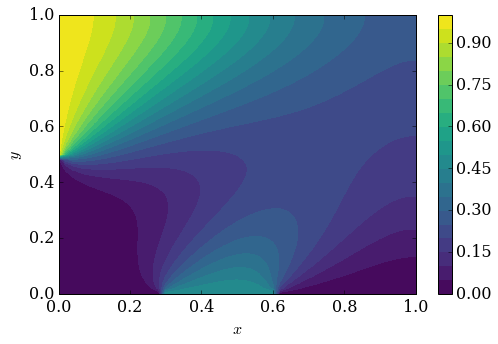

In [25]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,C_2d,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Is the result too abstract? Let's plot the result in 3D figure.

In [26]:
def plot_3D(x, y, C):
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,C[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.view_init(30,45)

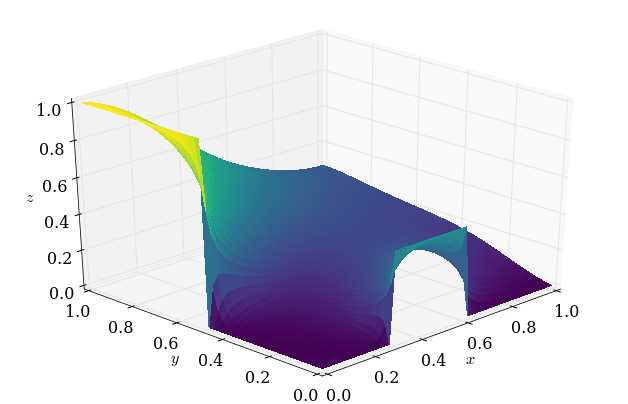

In [27]:
plot_3D(x,y,C_2d)